In [ ]:
import numpy as np
import pandas as pd


In [ ]:
data = pd.read_csv("/content/intelligent_streetlight_dataset.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 1000 non-null   object 
 1   Street ID                 1000 non-null   int64  
 2   Day/Night                 1000 non-null   object 
 3   Traffic Count             1000 non-null   int64  
 4   Traffic Density           1000 non-null   float64
 5   Traffic Speed             1000 non-null   float64
 6   Ambient Light (lux)       1000 non-null   float64
 7   Weather                   1000 non-null   object 
 8   Energy Consumption (kWh)  1000 non-null   float64
 9   Power State               1000 non-null   int64  
 10  Dim Level                 1000 non-null   int64  
 11  Latitude                  1000 non-null   float64
 12  Longitude                 1000 non-null   float64
 13  Special Event             1000 non-null   int64  
 14  Holiday/W

In [ ]:
data.isnull().sum()

Timestamp                   0
Street ID                   0
Day/Night                   0
Traffic Count               0
Traffic Density             0
Traffic Speed               0
Ambient Light (lux)         0
Weather                     0
Energy Consumption (kWh)    0
Power State                 0
Dim Level                   0
Latitude                    0
Longitude                   0
Special Event               0
Holiday/Weekend             0
dtype: int64

In [ ]:
# Ensure you're using the correct DataFrame name
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

# Extracting useful time-based features
data['Hour'] = data['Timestamp'].dt.hour
data['DayOfWeek'] = data['Timestamp'].dt.dayofweek
data['IsWeekend'] = data['DayOfWeek'].isin([5, 6])

data = pd.get_dummies(data, columns=['Day/Night'], drop_first=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Instantiate OrdinalEncoder
ordinal = OrdinalEncoder(categories=[['Clear', 'Cloudy', 'Rainy']])  # Example for custom order

# Fit and transform
data['Weather'] = ordinal.fit_transform(data[['Weather']])
data["Day/Night_Night"] = data["Day/Night_Night"].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Timestamp                 1000 non-null   datetime64[ns]
 1   Street ID                 1000 non-null   int64         
 2   Traffic Count             1000 non-null   int64         
 3   Traffic Density           1000 non-null   float64       
 4   Traffic Speed             1000 non-null   float64       
 5   Ambient Light (lux)       1000 non-null   float64       
 6   Weather                   1000 non-null   float64       
 7   Energy Consumption (kWh)  1000 non-null   float64       
 8   Power State               1000 non-null   int64         
 9   Dim Level                 1000 non-null   int64         
 10  Latitude                  1000 non-null   float64       
 11  Longitude                 1000 non-null   float64       
 12  Special Event        

# **EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

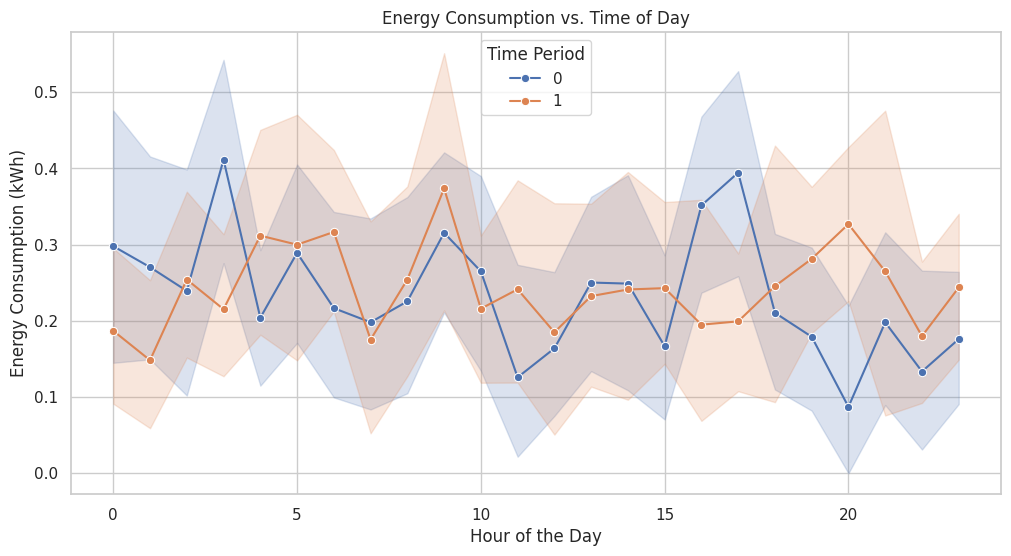

In [ ]:
# Set style
sns.set_theme(style="whitegrid")

# Line plot: Energy Consumption vs. Traffic Count over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x="Hour", y="Energy Consumption (kWh)", hue="Day/Night_Night", marker="o")
plt.title("Energy Consumption vs. Time of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Energy Consumption (kWh)")
plt.legend(title="Time Period")
plt.grid(True)
plt.show()

<ipython-input-85-523acb07945b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




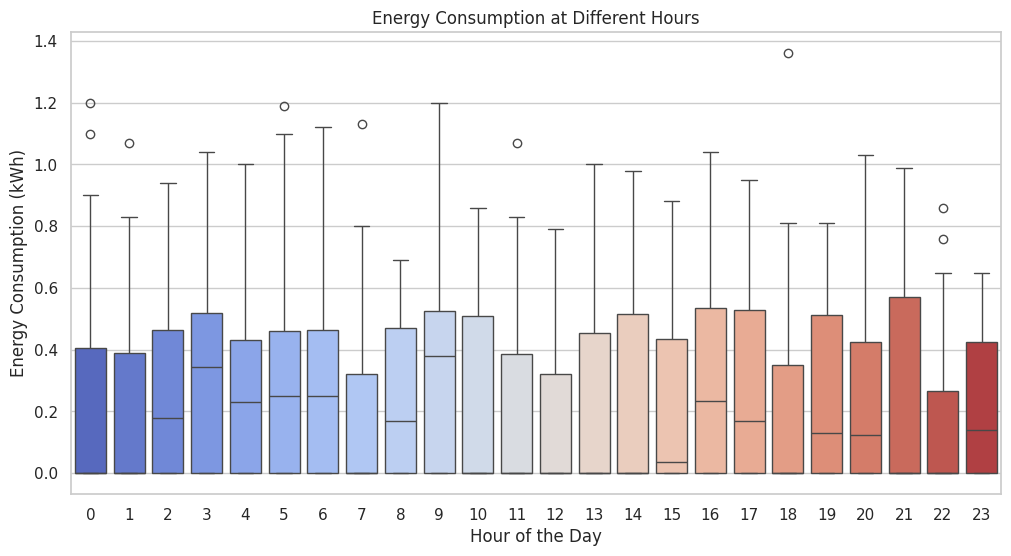

In [ ]:
# Boxplot: Energy Consumption Distribution by Hour
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="Hour", y="Energy Consumption (kWh)", palette="coolwarm")
plt.title("Energy Consumption at Different Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Energy Consumption (kWh)")
plt.show()


In [ ]:
correlation = data.corr()["Energy Consumption (kWh)"].sort_values(ascending=False)

plt.figure(figsize=(6, 10))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.title('Correlation with Energy Consumption (kWh)')
plt.show()

In [ ]:
# Selecting numerical columns for pairplot
num_cols = ["Energy Consumption (kWh)", "Traffic Count", "Traffic Density",
            "Traffic Speed", "Ambient Light (lux)", "Dim Level"]

# Creating pairplot
sns.pairplot(data[num_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Energy Consumption with Other Variables", fontsize=14, y=1.02)
plt.show()

In [ ]:
import plotly.graph_objects as go

# Selecting variables
x = data["Traffic Density"]
y = data["Ambient Light (lux)"]
z = data["Energy Consumption (kWh)"]

# Creating 3D surface plot
fig = go.Figure(data=[go.Mesh3d(
    x=x, y=y, z=z, opacity=0.5, color='lightblue'
)])

fig.update_layout(
    title="Energy Consumption vs Traffic Density & Ambient Light",
    scene=dict(
        xaxis_title="Traffic Density",
        yaxis_title="Ambient Light (lux)",
        zaxis_title="Energy Consumption (kWh)"
    )
)
fig.show()

In [ ]:
import plotly.express as px

# Map Weather numerical values to meaningful labels (if needed)
weather_mapping = {0: "Clear", 1: "Cloudy", 2: "Rainy", 3: "Snowy"}  # Adjust according to your dataset
data_filtered["Weather_Label"] = data_filtered["Weather"].map(weather_mapping)

# Map Day/Night values to readable labels
data_filtered["Day_Night_Label"] = data_filtered["Day/Night_Night"].map({0: "Day", 1: "Night"})

fig = px.sunburst(
    data_filtered,
    path=['Weather_Label', 'Day_Night_Label', 'Power State'],
    values='Energy Consumption (kWh)',
    color='Energy Consumption (kWh)',
    color_continuous_scale='viridis'
)

fig.update_layout(title="Energy Consumption Breakdown by Weather, Day/Night, and Power State")
fig.show()


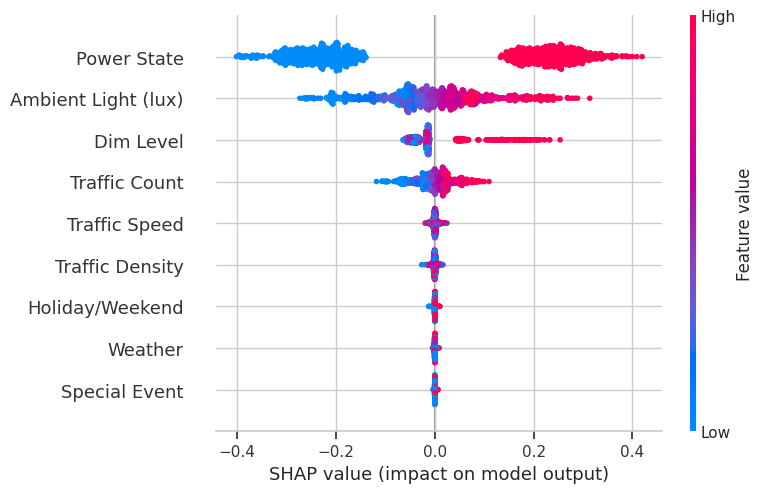

In [ ]:
import shap
import xgboost as xgb

# Selecting important features
features = ["Traffic Count", "Traffic Density", "Traffic Speed", "Ambient Light (lux)",
            "Dim Level", "Weather", "Power State", "Special Event", "Holiday/Weekend"]
X = data[features]
y = data["Energy Consumption (kWh)"]

# Train XGBoost model
model = xgb.XGBRegressor()
model.fit(X, y)

# SHAP explanation
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Plot feature importance
shap.summary_plot(shap_values, X)


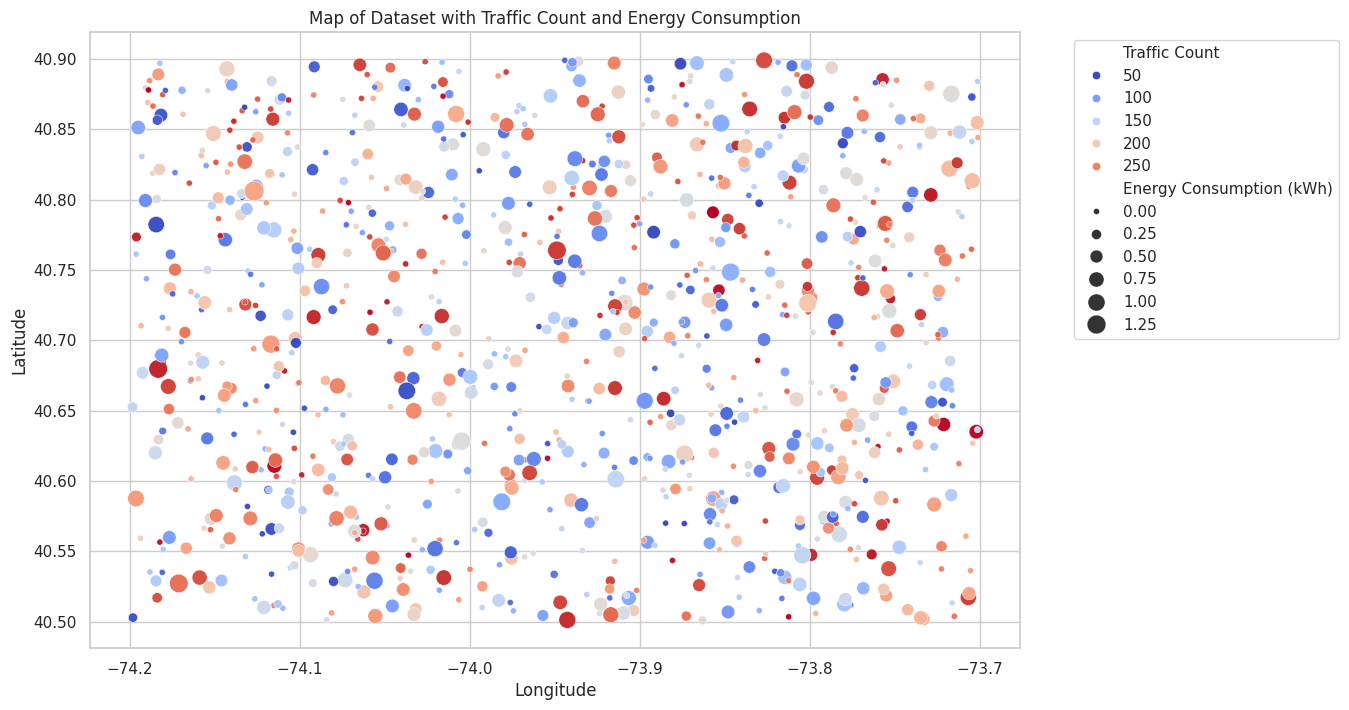

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Longitude',
    y='Latitude',
    hue='Traffic Count',
    size='Energy Consumption (kWh)',
    sizes=(20, 200),
    palette='coolwarm',
    data=data
)
plt.title('Map of Dataset with Traffic Count and Energy Consumption')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
import plotly.express as px

df_cleaned = data.dropna(subset=['Latitude', 'Longitude'])

fig = px.scatter(
    df_cleaned,
    x='Longitude',
    y='Latitude',
    color='Traffic Density',
    size='Energy Consumption (kWh)',
    hover_data=['Street ID', 'Traffic Count', 'Traffic Speed'],
    title='Geospatial Distribution of Dataset'
)

fig.show()

# **Final Pre-processing**

In [ ]:
data = data.drop(columns=['Timestamp', 'Weather', 'Traffic Density', 'DayOfWeek'])
data.dtypes

Street ID                     int64
Traffic Count                 int64
Traffic Speed               float64
Ambient Light (lux)         float64
Energy Consumption (kWh)    float64
Power State                   int64
Dim Level                     int64
Latitude                    float64
Longitude                   float64
Special Event                 int64
Holiday/Weekend               int64
Hour                          int32
IsWeekend                      bool
Day/Night_Night               int64
dtype: object

In [ ]:
data.head()

Street ID  Traffic Count  Traffic Speed  Ambient Light (lux)  \
0          8            154      59.383884           172.439065   
1          3            103      24.208586           189.339042   
2          9            203      29.733312           200.236036   
3          5            161      27.850047           197.078404   
4          1             55      59.282133           279.109775   

   Energy Consumption (kWh)  Power State  Dim Level   Latitude  Longitude  \
0                      0.37            1         50  40.877092 -73.813538   
1                      0.00            0        100  40.862553 -74.125943   
2                      0.00            0         75  40.809826 -73.853724   
3                      0.78            1        100  40.529601 -74.073302   
4                      0.46            1         50  40.565817 -74.116742   

   Special Event  Holiday/Weekend  Hour  IsWeekend  Day/Night_Night  
0              1                0     5       True                0  
1              0                0    12      False                1  
2              1                0    20      False                1  
3              0                0    13      False                0  
4              1                1     7      False                1

## **Machine learning**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = data.drop(columns=['Energy Consumption (kWh)'])
y = data['Energy Consumption (kWh)']

columns_to_scale = ['Traffic Count', 'Traffic Speed', 'Ambient Light (lux)', 'Dim Level', 'Latitude', 'Longitude']

scaler = StandardScaler()
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

In [ ]:
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")

Training features shape: (800, 6)
Test features shape: (200, 6)


In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Performance Metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [ ]:
print(f"Random Forest Results:\nRMSE: {rmse_rf}\nMAE: {mae_rf}\nR¬≤: {r2_rf}")

# Feature Importance Plot
feature_importances = pd.DataFrame({
    'Feature': ['PC' + str(i+1) for i in range(X_pca.shape[1])],
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest (after PCA)')
plt.gca().invert_yaxis()
plt.show()

Random Forest Results:
RMSE: 0.28116211160111887
MAE: 0.24455000000000002
R¬≤: 0.06881341494454074


In [ ]:
import xgboost as xgb

# Train XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Performance Metrics
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

In [ ]:
print(f"\nXGBoost Results:\nRMSE: {rmse_xgb}\nMAE: {mae_xgb}\nR¬≤: {r2_xgb}")


XGBoost Results:
RMSE: 0.2818132266692634
MAE: 0.23439396209758706
R¬≤: 0.06449553826428267


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape for LSTM (samples, time steps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(32),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

# Train Model
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 18ms/step - loss: 0.0938 - val_loss: 0.0784
Epoch 2/50
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0836 - val_loss: 0.0879
Epoch 3/50
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0808 - val_loss: 0.0761
Epoch 4/50
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 8ms/step - loss: 0.0794 - val_loss: 0.0764
Epoch 5/50
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 9ms/step - loss: 0.0807 - val_loss: 0.0756
Epoch 6/50
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0815 - val_loss: 0.0771
Epoch 7/50
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - loss: 0.0807 - val_loss: 0.0759
Epoch 8/50
50/50 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step - loss: 0.0778 - val_loss: 0.0760
Epoch 9/50
50/50 

In [ ]:
# Predictions
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()

# Performance Metrics
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print(f"\nLSTM Results:\nRMSE: {rmse_lstm}\nMAE: {mae_lstm}\nR¬≤: {r2_lstm}")

7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 58ms/step

LSTM Results:
RMSE: 0.27853024105117913
MAE: 0.24216632482707504
R¬≤: 0.08616491458386522


In [ ]:
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'LSTM'],
    'RMSE': [rmse_rf, rmse_xgb, rmse_lstm],
    'MAE': [mae_rf, mae_xgb, mae_lstm],
    'R¬≤': [r2_rf, r2_xgb, r2_lstm]
})

print("\nModel Performance Comparison:\n")
print(results_df)


Model Performance Comparison:

           Model      RMSE       MAE        R¬≤
0  Random Forest  0.281162  0.244550  0.068813
1        XGBoost  0.281813  0.234394  0.064496
2           LSTM  0.278530  0.242166  0.086165


# **Fine-Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

rf_tuned = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, n_iter=10, scoring='neg_mean_squared_error', n_jobs=-1)
rf_tuned.fit(X_train, y_train)

# Best Model
best_rf = rf_tuned.best_estimator_
y_pred_rf_tuned = best_rf.predict(X_test)

# Performance
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print(f"\nüîπ Tuned Random Forest:\nRMSE: {rmse_rf_tuned}\nMAE: {mae_rf_tuned}\nR¬≤: {r2_rf_tuned}")



üîπ Tuned Random Forest:
RMSE: 0.2762338629506262
MAE: 0.24094523734366238
R¬≤: 0.10117125751793965


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_tuned = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_tuned.fit(X_train, y_train)

# Best Model
best_xgb = xgb_tuned.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)

# Performance
rmse_xgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned))
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

print(f"\nüîπ Tuned XGBoost:\nRMSE: {rmse_xgb_tuned}\nMAE: {mae_xgb_tuned}\nR¬≤: {r2_xgb_tuned}")



üîπ Tuned XGBoost:
RMSE: 0.2764428757371245
MAE: 0.24505616150796414
R¬≤: 0.09981054255808386


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Reshape data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build an improved LSTM model
lstm_model_tuned = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1)
])

lstm_model_tuned.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Model
lstm_model_tuned.fit(X_train_lstm, y_train, epochs=100, batch_size=32, validation_data=(X_test_lstm, y_test), callbacks=[early_stop], verbose=1)

# Predictions
y_pred_lstm_tuned = lstm_model_tuned.predict(X_test_lstm).flatten()

# Performance
rmse_lstm_tuned = np.sqrt(mean_squared_error(y_test, y_pred_lstm_tuned))
mae_lstm_tuned = mean_absolute_error(y_test, y_pred_lstm_tuned)
r2_lstm_tuned = r2_score(y_test, y_pred_lstm_tuned)

print(f"\nüîπ Tuned LSTM:\nRMSE: {rmse_lstm_tuned}\nMAE: {mae_lstm_tuned}\nR¬≤: {r2_lstm_tuned}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 54ms/step - loss: 0.1038 - val_loss: 0.0897
Epoch 2/100
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 19ms/step - loss: 0.0865 - val_loss: 0.0819
Epoch 3/100
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 20ms/step - loss: 0.0907 - val_loss: 0.0836
Epoch 4/100
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 20ms/step - loss: 0.0843 - val_loss: 0.0948
Epoch 5/100
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 20ms/step - loss: 0.0887 - val_loss: 0.0821
Epoch 6/100
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 20ms/step - loss: 0.0853 - val_loss: 0.0791
Epoch 7/100
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 24ms/step - loss: 0.0789 - val_loss: 0.0814
Epoch 8/100
25/25 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 19ms/step - loss: 0.0821 - val_loss

7/7 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 83ms/step

üîπ Tuned LSTM:
RMSE: 0.2769356239569422
MAE: 0.24316010760366916
R¬≤: 0.09659858007688593


In [ ]:
results_tuned = pd.DataFrame({
    'Model': ['Random Forest (Tuned)', 'XGBoost (Tuned)', 'LSTM (Tuned)'],
    'RMSE': [rmse_rf_tuned, rmse_xgb_tuned, rmse_lstm_tuned],
    'MAE': [mae_rf_tuned, mae_xgb_tuned, mae_lstm_tuned],
    'R¬≤': [r2_rf_tuned, r2_xgb_tuned, r2_lstm_tuned]
})

print("\nüöÄ Model Performance After Fine-Tuning:\n")
print(results_tuned)



üöÄ Model Performance After Fine-Tuning:

                   Model      RMSE       MAE        R¬≤
0  Random Forest (Tuned)  0.276234  0.240945  0.101171
1        XGBoost (Tuned)  0.276443  0.245056  0.099811
2           LSTM (Tuned)  0.276936  0.243160  0.096599


# **Develop a Visualization Dashboard for Urban Planners**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Correlation Matrix
corr_matrix = data.corr()

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['Energy Consumption (kWh)']].sort_values(by="Energy Consumption (kWh)", ascending=False),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title("üîç Sensitivity Analysis: Factors Influencing Energy Consumption")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.

